1. Point estimates vs. distributions
2. Measures of variance
3. Using resampling (simulation) to bootstrap intuitions about results
4. Questions about Lab Report 1

In [36]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Data from: 
# Hulme, R. C., Begum, A., Nation, K., & Rodd, J. M. (2022). Diversity of narrative context disrupts the early stage of learning the meanings of novel words.
# https://psyarxiv.com/uh9f2/

url = 'https://osf.io/download/r7udh/'

df = pd.read_csv(url)


In [94]:
df.head(10)

,Participant.ID,Version,Set,Subset,Baseword,Diversity,Item,Question,Response.Box,Response,Score
0,1,B2,B,2,shirt,low,hust,Earlier you read about a type of shirt that wa...,1,stretchy,3.0
7,1,B2,B,1,cockroach,high,veak,Earlier you read about a type of cockroach tha...,1,native to New Zealand,2.0
14,1,B2,B,2,sled,low,deam,Earlier you read about a type of sled that was...,1,can fit one adult or two children,2.0
21,1,B2,B,1,tissue,high,bamp,Earlier you read about a type of tissue that w...,1,made of panda faeces,4.0
28,1,B2,B,2,car,low,zove,Earlier you read about a type of car that was ...,1,you can remove the steering wheel to enable au...,4.0
35,1,B2,B,1,cigarette,high,coft,Earlier you read about a type of cigarette tha...,1,it is extra long,3.0
42,1,B2,B,2,frisbee,low,yark,Earlier you read about a type of frisbee that ...,1,it comes in 30 colours,3.0
49,1,B2,B,1,dog,high,hoad,Earlier you read about a type of dog that was ...,1,they have bright green eyes,3.0
56,2,A1,A,1,carrot,low,flam,Earlier you read about a type of carrot that w...,1,purple colour,3.0
63,2,A1,A,1,window blind,low,tock,Earlier you read about a type of window blind ...,1,expensive to install,5.0


In [363]:
df.shape

(800, 11)

In [99]:
print(len(set(df['Participant.ID'])))
print(len(df.loc[df['Diversity'] == 'low']))
print(len(df.loc[df['Diversity'] == 'high']))

100
400
400


<AxesSubplot:xlabel='Score', ylabel='Count'>

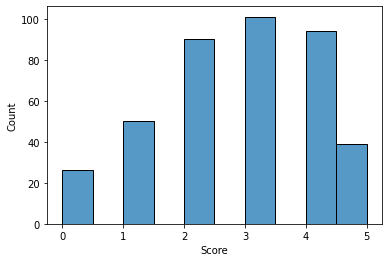

In [100]:
sns.histplot(df.loc[df['Diversity'] == 'low'], x = 'Score')

In [101]:
df.loc[df['Diversity'] == 'low']['Score'].unique()

array([3., 2., 4., 5., 1., 0.])

<AxesSubplot:xlabel='Score', ylabel='Count'>

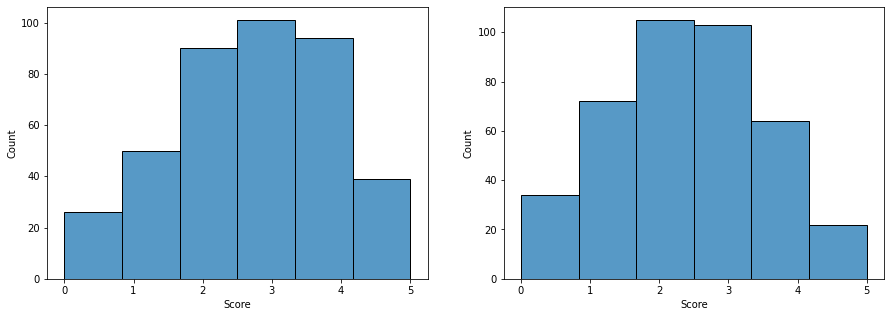

In [102]:
df = df.dropna()
df['Score'].astype(int)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df_low = df.loc[df['Diversity'] == 'low']
df_high = df.loc[df['Diversity'] == 'high']


sns.histplot(df_low, x = 'Score', bins = 6, ax = axes[0])
sns.histplot(df_high, x = 'Score', bins = 6, ax = axes[1])


<AxesSubplot:xlabel='Score', ylabel='Density'>

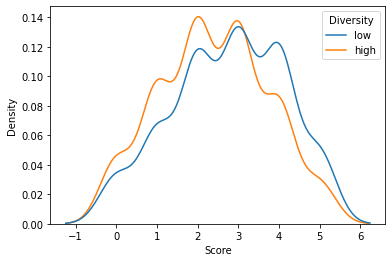

In [103]:
sns.kdeplot(data = df, x = 'Score', hue = 'Diversity')

<AxesSubplot:xlabel='Diversity', ylabel='Score'>

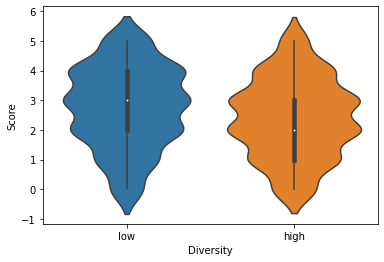

In [365]:
sns.violinplot(data=df, x = 'Diversity', y = 'Score')

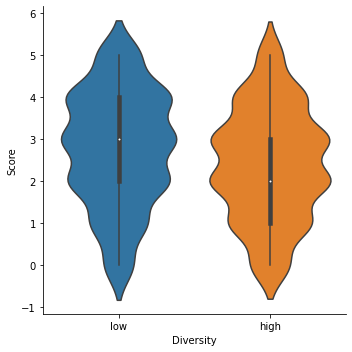

In [114]:
sns.catplot(data = df, x = 'Diversity', y = 'Score', kind = 'violin')

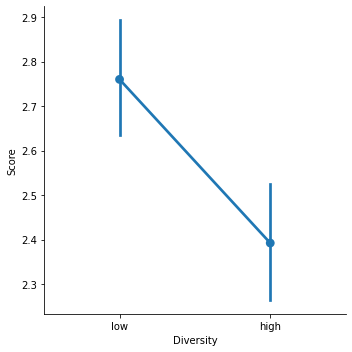

In [113]:
sns.catplot(data = df, x = 'Diversity', y = 'Score', kind = 'point')

In [105]:
print(df_low['Score'].mean())
print(df_high['Score'].mean())

2.76
2.3925


## Let's investigate the data with simulation

In [283]:
import numpy as np

sim_low = []
for i in range(10):
    sim_low.append(np.random.choice(df_low['Score'], 50, replace = True))

sim_high = []
for i in range(10):
    sim_high.append(np.random.choice(df_high['Score'], 50, replace = True))


In [369]:
np.random.choice(df_low['Score'], 50, replace = True)

array([4., 2., 5., 3., 4., 3., 2., 2., 4., 0., 4., 3., 4., 1., 3., 2., 3.,
       4., 0., 2., 4., 1., 3., 3., 3., 4., 2., 4., 4., 2., 2., 1., 2., 0.,
       4., 4., 2., 0., 4., 3., 1., 4., 3., 2., 3., 3., 3., 5., 5., 3.])

In [284]:
#sim_low[0:2]

[array([3., 4., 4., 1., 1., 4., 1., 2., 2., 4., 2., 2., 4., 5., 1., 1., 2.,
        4., 3., 3., 1., 2., 4., 5., 3., 2., 1., 3., 1., 3., 3., 1., 2., 3.,
        4., 4., 5., 2., 3., 2., 0., 4., 4., 4., 2., 5., 3., 1., 5., 2.]),
 array([4., 4., 5., 2., 1., 3., 4., 5., 4., 3., 2., 3., 4., 3., 3., 0., 2.,
        4., 4., 4., 3., 3., 5., 4., 3., 2., 3., 1., 4., 0., 2., 4., 1., 2.,
        4., 0., 4., 0., 2., 2., 4., 3., 1., 4., 4., 2., 3., 4., 1., 4.])]

<AxesSubplot:xlabel='id', ylabel='score'>

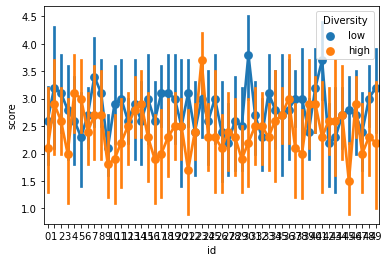

In [366]:
import numpy as np

sim_low = []
for i in range(10):
    sim_low.append(np.random.choice(df_low['Score'], 50, replace = True))

sim_high = []
for i in range(10):
    sim_high.append(np.random.choice(df_high['Score'], 50, replace = True))

sim_data_low = pd.DataFrame(sim_low)
sim_means_low = sim_data_low.mean()

sim_data_high = pd.DataFrame(sim_high)
sim_means_high = sim_data_high.mean()

sim_data_low = sim_data_low.melt(var_name = 'id', value_name = 'score')
sim_data_high = sim_data_high.melt(var_name = 'id', value_name = 'score')

sim_data_low['Diversity'] = ['low']*len(sim_data_low)
sim_data_high['Diversity'] = ['high']*len(sim_data_high)

sim_data_long = pd.concat([sim_data_low,sim_data_high])

sns.pointplot(data = sim_data_long, x = 'id', y = 'score', hue = 'Diversity', linestyle = ' ')




In [304]:
sim_low = []
for i in range(10):
    sim_low.append(np.random.choice(df_low['Score'], 50, replace = True))

sim_high = []
for i in range(10):
    sim_high.append(np.random.choice(df_high['Score'], 50, replace = True))

sim_data_low = pd.DataFrame(sim_low)
sim_means_low = sim_data_low.mean()

sim_data_high = pd.DataFrame(sim_high)
sim_means_high = sim_data_high.mean()

sim_data_low = sim_data_low.melt(var_name = 'id', value_name = 'score')
sim_data_high = sim_data_high.melt(var_name = 'id', value_name = 'score')

sim_data_low['Diversity'] = ['low']*len(sim_data_low)
sim_data_high['Diversity'] = ['high']*len(sim_data_high)

sim_data_long = pd.concat([sim_data_low,sim_data_high])

#sns.pointplot(data = sim_data_long, x = 'id', y = 'score', hue = 'Diversity', linestyle = ' ')

sim_data_long = sim_data_long.groupby(['id', 'Diversity']).mean()
sim_data_long.reset_index(inplace = True)
sim_data_long

,id,Diversity,score
0,0,high,2.2
1,0,low,2.9
2,1,high,1.8
3,1,low,1.9
4,2,high,2.2
...,...,...,...
95,47,low,2.4
96,48,high,1.5
97,48,low,2.6
98,49,high,2.8


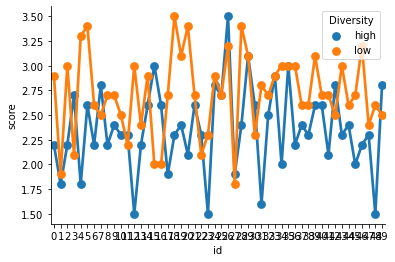

In [321]:
sns.pointplot(data = sim_data_long, 
              x = 'id', 
              y = 'score', 
              hue = 'Diversity')
sns.despine()

How often does high diversity actually result in better scores?

In [361]:
compare = zip(sim_data_long.loc[sim_data_long['Diversity'] == 'high']['score'],
              sim_data_long.loc[sim_data_long['Diversity'] == 'low']['score'])
compare = list(compare)
compare

[(2.2, 2.9),
 (1.8, 1.9),
 (2.2, 3.0),
 (2.7, 2.1),
 (1.8, 3.3),
 (2.6, 3.4),
 (2.2, 2.6),
 (2.8, 2.5),
 (2.2, 2.7),
 (2.4, 2.7),
 (2.3, 2.5),
 (2.3, 2.2),
 (1.5, 3.0),
 (2.2, 2.4),
 (2.6, 2.9),
 (3.0, 2.0),
 (2.6, 2.0),
 (1.9, 2.7),
 (2.3, 3.5),
 (2.4, 3.1),
 (2.1, 3.4),
 (2.6, 2.7),
 (2.3, 2.1),
 (1.5, 2.3),
 (2.8, 2.9),
 (2.7, 2.7),
 (3.5, 3.2),
 (1.9, 1.8),
 (2.4, 3.4),
 (3.1, 3.1),
 (2.6, 2.3),
 (1.6, 2.8),
 (2.5, 2.7),
 (2.9, 2.9),
 (2.0, 3.0),
 (3.0, 3.0),
 (2.2, 3.0),
 (2.4, 2.6),
 (2.3, 2.6),
 (2.6, 3.1),
 (2.6, 2.7),
 (2.1, 2.7),
 (2.8, 2.5),
 (2.3, 3.0),
 (2.4, 2.6),
 (2.0, 2.7),
 (2.2, 3.2),
 (2.3, 2.4),
 (1.5, 2.6),
 (2.8, 2.5)]

In [362]:
highs = [1 for x in compare if x[0]>x[1]]
lows = [1 for x in compare if x[0]<x[1]]
same = [1 for x in compare if x[0]==x[1]]
print(sum(highs))
print(sum(lows))
print(sum(same))


11
35
4


In [151]:
print(df_sim_means['Low'].mean())
print(df_sim_means['High'].mean())

2.6879999999999997
2.375
